# introductory text (explain: dataset, task)

what dataset are you working with?  what are you trying to do? ..
The dataset I am working with is called Knee Osteoarthritis with KL Grading and it was organized by OAI. I will be using their training data in this. The images in this dataset were categorized into 5 grades, grades 0 through 4, in 2018. The training set contains  5,778 x-ray images of knee joints that are labeled by the grade of damage present. The images include images from both left and right knees. The lower the grade is the less prevelant the osteoarthritis is in the joint. My goal with this dataset is to create a model that attempts to categorize these images into the grade they were given by the researchers running the study. Of the images I am using 2286 of them are classified as grade 0, 1516 of them are grade 1, 1046 are grade 2, 757 are grade 3, and 173 are grade 4. This breakdown can be seen in the analyze the dataset section below.

# import requisite modules

In [1]:
from pathlib import Path
from PIL import Image, ImageFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

# helper functions (if necessary)

In [2]:
# python code

# pre-process, analyze dataset

In [3]:
rootPath= Path("train").glob("**/*.png")

listImg = []

for imgPath in rootPath:
    imagePath = str(imgPath)
    image = Image.open(imagePath)
    image = image.convert("L")
    image = image.filter(ImageFilter.FIND_EDGES)
    image = image.resize((224,224))
    listImg.append([imagePath,int(imgPath.parts[1])])
    image.close()

    
data = pd.DataFrame(listImg, columns = ["id", "label"])
y= data['label']
X = data.drop(['label'], axis = 1)
print(np.unique(y))
print(data['label'].value_counts())

[0 1 2 3 4]
0    2286
2    1516
1    1046
3     757
4     173
Name: label, dtype: int64


# visualize dataset

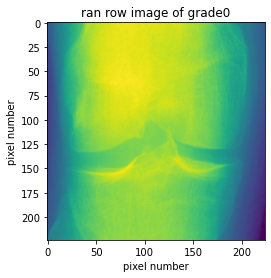

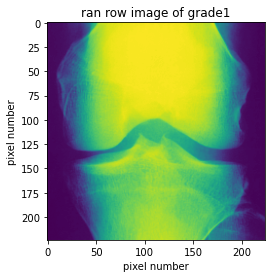

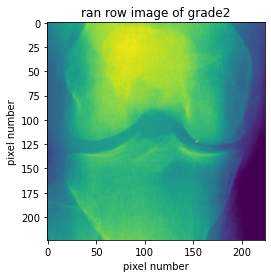

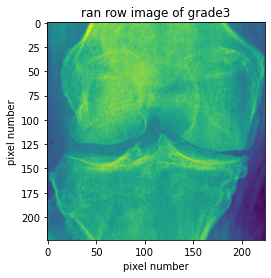

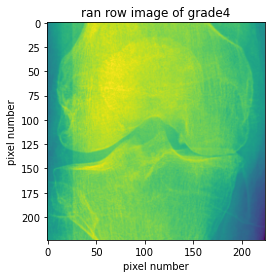

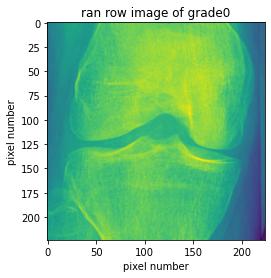

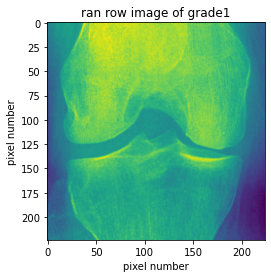

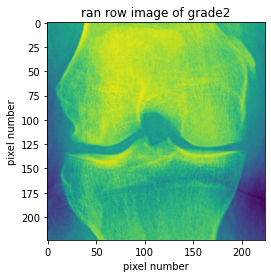

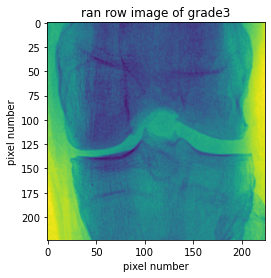

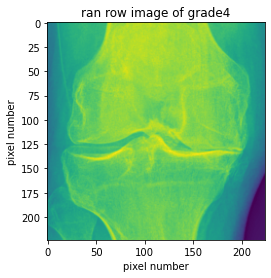

In [4]:
np.random.seed(2)

for i in range(0,5):
    grade = X.loc[data['label'] == i]
    
    ranNum1 = np.random.randint(grade.shape[0]) 
    
    x = grade.iloc[[ranNum1]]
    path = x.iat[0,0]
    image = Image.open(path)
    pixelList = np.asarray(image)
    plt.imshow(pixelList)
    plt.title("ran row image of grade" + str(i))
    plt.ylabel("pixel number")
    plt.xlabel("pixel number")
    plt.show()
    image.close()
    
for i in range(0,5):
    grade = X.loc[data['label'] == i]
    
    ranNum1 = np.random.randint(grade.shape[0]) 
    
    x = grade.iloc[[ranNum1]]
    path = x.iat[0,0]
    image = Image.open(path)
    pixelList = np.asarray(image)
    plt.imshow(pixelList)
    plt.title("ran row image of grade" + str(i))
    plt.ylabel("pixel number")
    plt.xlabel("pixel number")
    plt.show()
    image.close()

# experiment with algorithms, feature sets, parameters, etc.,

In [5]:
def CNN_model(num_classes):
    model = Sequential()
    model.add(Conv2D(filters = 32,
                     kernel_size = (5,5),
                     padding='valid',
                     input_shape=(224,224,1),
                     data_format='channels_last',
                     activation='relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(rate=0.2))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def CNN_model2(num_classes):
    model = Sequential()
    model.add(Conv2D(filters = 32,
                     kernel_size = (5,5),
                     padding='valid',
                     input_shape=(224,224,1),
                     data_format='channels_last',
                     activation='tanh'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(rate=0.2))
    model.add(Flatten())
    model.add(Dense(units=128, activation='tanh'))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], steps_per_execution=(14))
    return model

def CNN_model3(num_classes):
    model = Sequential()
    model.add(Conv2D(filters = 64,
                     kernel_size = (3,3),
                     padding='valid',
                     input_shape=(224,224,1),
                     data_format='channels_last',
                     activation='tanh'))
    model.add(MaxPooling2D(pool_size = (5,5)))
    model.add(Conv2D(filters = 32,
                     kernel_size = (3,3),
                     padding='valid',
                     data_format='channels_last',
                     activation='tanh'))
    model.add(MaxPooling2D(pool_size = (4,4)))
    model.add(Dropout(rate=0.2))
    model.add(Flatten())
    model.add(Dense(units=128, activation='tanh'))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def CNN_model4(num_classes):
    model = Sequential()
    model.add(Conv2D(filters = 192,
                     kernel_size = (3,3),
                     padding='valid',
                     input_shape=(224,224,1),
                     data_format='channels_last',
                     activation='tanh'))
    model.add(MaxPooling2D(pool_size = (5,5)))
    model.add(Conv2D(filters = 32,
                     kernel_size = (3,3),
                     padding='valid',
                     data_format='channels_last',
                     activation='tanh'))
    model.add(MaxPooling2D(pool_size = (4,4)))
    model.add(Dropout(rate=0.2))
    model.add(Flatten())
    model.add(Dense(units=128, activation='tanh'))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def CNN_model5(num_classes):
    model = Sequential()
    model.add(Conv2D(filters = 320,
                     kernel_size = (3,3),
                     padding='valid',
                     input_shape=(224,224,1),
                     data_format='channels_last',
                     activation='tanh'))
    model.add(MaxPooling2D(pool_size = (5,5)))
    model.add(Conv2D(filters = 32,
                     kernel_size = (3,3),
                     padding='valid',
                     data_format='channels_last',
                     activation='tanh'))
    model.add(MaxPooling2D(pool_size = (4,4)))
    model.add(Dropout(rate=0.2))
    model.add(Flatten())
    model.add(Dense(units=128, activation='tanh'))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def CNN_model6(num_classes):
    model = Sequential()
    model.add(Conv2D(filters = 320,
                     kernel_size = (3,3),
                     padding='valid',
                     input_shape=(224,224,1),
                     data_format='channels_last',
                     activation='tanh'))
    model.add(MaxPooling2D(pool_size = (5,5)))
    model.add(Conv2D(filters = 32,
                     kernel_size = (3,3),
                     padding='valid',
                     data_format='channels_last',
                     activation='tanh'))
    model.add(MaxPooling2D(pool_size = (4,4)))
    model.add(Dropout(rate=0.2))
    model.add(Flatten())
    model.add(Dense(units=128, activation='tanh'))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], steps_per_execution=(10))
    return model

def CNN_model7(num_classes):
    model = Sequential()
    model.add(Conv2D(filters = 320,
                     kernel_size = (3,3),
                     padding='valid',
                     input_shape=(224,224,1),
                     data_format='channels_last',
                     activation='tanh'))
    model.add(MaxPooling2D(pool_size = (5,5)))
    model.add(Conv2D(filters = 32,
                     kernel_size = (3,3),
                     padding='valid',
                     data_format='channels_last',
                     activation='tanh'))
    model.add(MaxPooling2D(pool_size = (4,4)))
    model.add(Dropout(rate=0.2))
    model.add(Flatten())
    model.add(Dense(units=128, activation='tanh'))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], steps_per_execution=(14))
    return model

def CNN_model8(num_classes):
    model = Sequential()
    model.add(Conv2D(filters = 320,
                     kernel_size = (3,3),
                     padding='valid',
                     input_shape=(224,224,1),
                     data_format='channels_last',
                     activation='tanh'))
    model.add(MaxPooling2D(pool_size = (5,5)))
    model.add(Conv2D(filters = 32,
                     kernel_size = (3,3),
                     padding='valid',
                     data_format='channels_last',
                     activation='tanh'))
    model.add(MaxPooling2D(pool_size = (4,4)))
    model.add(Dropout(rate=0.2))
    model.add(Flatten())
    model.add(Dense(units=128, activation='tanh'))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], steps_per_execution=(22))
    return model

pixels = []
for j in range (0, 5778):
    path = X.iat[j ,0]
    image = Image.open(path)
    pix = np.asarray(image)
    pix = pix.reshape(1,50176) 
    pixels.append(pix)
    image.close()


y=np_utils.to_categorical(y)
num_classes = y.shape[1]

X = np.concatenate(pixels, axis=0)
X = X.reshape(len(X),224,224,1) 
X = X/255


cnn = CNN_model(num_classes)
cnn.fit(X,y)



cnn2 = CNN_model2(num_classes)
cnn2.fit(X,y)


cnn3 = CNN_model3(num_classes)
cnn3.fit(X,y)


cnn4 = CNN_model4(num_classes)
cnn4.fit(X,y)


cnn5 = CNN_model5(num_classes)
cnn5.fit(X,y, epochs = 10)


cnn6 = CNN_model6(num_classes)
cnn6.fit(X,y, epochs = 10)


cnn7 = CNN_model7(num_classes)
cnn7.fit(X,y, epochs = 14)


cnn8 = CNN_model8(num_classes)
cnn8.fit(X,y, epochs = 22)

# visualize experimental results


For this section, I did the CNN on the server because they ran versy slow. The executions are screenshots of the code.
1) This image shows the results of using relu 32 filters, one max pooling layer and a kernel size of 5x5 max pooling 2x2
<img src = "img2.png">

2) This image shows the results of switch relu to tanh. It has the same 32 filters, one max pooling layer and a kernel size of 5x5. (This was done with other activations as well but tanh was the best so it was kept in this document.) This was used to test the activations of keras. pooling size 2x2.
<img src = "img3.png">

3) For this model, I kept the tahn activation, 64 filters and a kernel size of 3x3. One change I made here was adding a second max pooling layer. pool size 5x5 for first layer and 4x4 in second layer.
<img src = "img4.png">

4) For this model, I stuck with two max pooling layers because it helped this model in particular. I made the filters 192 and kept a kernel size of 3x3. pool size 5x5 for first layer and 4x4 in second layer. This one uses tanh as well
<img src = "img5.png">

5) For this model I increased the filters to 320. I kept two pooling layers, 3x3 kernel size.pool size 5x5 for first layer and 4x4 in second layer. It uses tanh as its activation
<img src = "img6.png">

6) This model takes the model of 5 which was working well on this data set and did 10 epochs on it.
<img src = "img7.png">

7) This model uses tanh. It has a kernel size of 3x3. It has two max pooling layers one at 5x5 the other at 4x4, 320 layers and ran 14 epochs.

<img src = "img1.png">

8) This model works with a kernel of 3x3. The filters is set to 320 and I kept two max pooling layers 5x5 followed by 4x4. It has 22 epochs. Its activation function is tanh.
<img src = "img8.png">


Now a table of the accuracies:
<img src = "img9.png">

# analyze / explain experimental results

what worked? what didn't? WHY?
This dataset did not have a feature set. It was made of pixelated images and a class label that identified the type of x-ray image.
For this CNN, adding a higher filter count was very helpful in making the accuracy higher. A higher filter helped the accuracy becuase these images were larger then the ones we worked on in class and it helped the image not lose as much data in the filtering process. I also saw some improvements with switching where it says activation relu to an activation of tanh. This can be seen by the first two attempts at changing up the paramaters of the CNN where everything else was pretty stagnent and I tried out the different activation types. (Since it took so long to run I kept relu the basic one and then the best activation I found which was tanh). Adding epochs to the models tended to increase the overall accuracy of the model. Epochs increase the accuracy because the algorithm runs through the data more then once when this is set. 
One thing that did not work very well with this model was a filter size under about 200. Even with multiple epochs these filter sizes had issues getting over 40 percent accuracy. The feature maps with the smaller filter size seemed to loose too much data from the original picture, so it was helpful to increase the filter size. I haven't had much success with adding in more hidden layers to the cnn in this project. It is very possible that if I had the time to spend on trying different combinations for a second even third layer this could help with the resulting acuracy. I think this did not work well for me because I wasn't as sure about what to change in this layer to get the most out of it being there.
For this project I worked with the cnn structure. This structure I thought would work well for complex pictures becuase it had more to it then a basic artificial neural network. I thought this would be the best way to look at these images when to the naked eye it can be difficult to read an x-ray. I thought there should be some complexity to the network to make it work the best at classifying these images.
I think a reason I had difficulties getting this to train is how uneven the categories of images are. It might have been helpful to have a more even distribution of the types of grades and overall more grade 3 and 4 images.

# conclusion 

For this final project, my goal was to classify x-ray images by their kl grading on knee joints. These models were fed 5,788 x-ray images of both the right and left knee and attempted to guess the grade a x-ray tech would have given the joint deteriation. These grades ranged from 0 to 4. I was able to get a model to 66 percent accurate which I am pretty proud of with this dataset. If I had more time I would have gone through and tried out larger filter sizes and messed around with adding hidden layers into the network. 

For this task I used a cnn model and modified different pieces of it each time I ran the model. Something that didn't seem to help in classifying these models was adding an extra hidden layer. This is something that I would like to mess around with because I believe if it is done with the right parameters this could really improve how the cnn performed. Filter sizes deffintily had the larger impact on the accuracy that I could see when I was testing out different models some of which were not shown in this project to keep it at a managable length and time for running. I think increasing this number was helpful to not loosing as much information in the filtering process since these images were much larger then what we have worked with in the past and more detailed. Another thing that helped in this case was changing the activation function; the tahn function seemed to work the best in this case. 